###### 利用一个星系的公开图像、光谱及星表等观测数据，从星系的形态、结构、星族、组成（除恒星之外的其它成份）、环境特征等多个角度来进行论述。
###### 每个特征20分（每个特征至少配有一张图）。
###### 不能合做

Filename: frame-r-001740-3-0082.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      85   (2048, 1489)   float32   
  1                1 ImageHDU         6   (2048,)   float32   
  2                1 BinTableHDU     27   1R x 3C   [49152E, 2048E, 1489E]   
  3                1 BinTableHDU     79   1R x 31C   [J, 3A, J, A, D, D, 2J, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, E]   


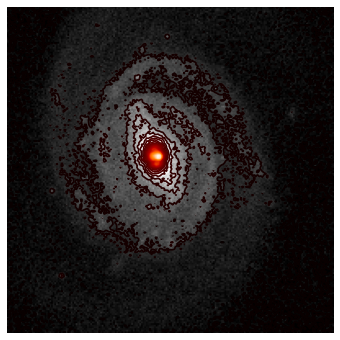

In [1]:
##  NGC 0165
### 基本信息 location:(23.4620691, 30.6601751)  distance = 74.188 Mpc  z = 0.0196

# ! wget http://dr18.sdss.org/sas/dr18/prior-surveys/sdss4-dr17-eboss/photoObj/frames/301/1740/3/frame-r-001740-3-0082.fits.bz2
# ! wget http://dr18.sdss.org/sas/dr18/spectro/sdss/redux/26/spectra/lite/0654/spec-0654-52146-0038.fits

import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from astropy.wcs import WCS
import numpy as np 

image_file= get_pkg_data_filename('frame-r-001740-3-0082.fits')
fits.info(image_file)
image_data = fits.getdata(image_file)

plt.figure()
plt.axis("off")
plt.imshow(image_data[700:900, 700:900], vmin=0, vmax=1, cmap='gray')
plt.grid(None)
plt.contour(image_data[700:900, 700:900],40)
# plt.colorbar()

### morphology: face-on spiral galaxy
### structure: bulge, bar, disk, spiral arms

In [2]:
### apparent magnitudes r = 12.966
mr = 12.966
d = 74.188*1e6
Mr = mr-5*np.log10(d)+5
print(Mr)

-21.385668316472888


[3.81176189]
[6.43044231]


/tmp/ipykernel_2963518/1551454870.py:32: RuntimeWarning: invalid value encountered in log10
  plt.plot((R/Re)**0.25, 22.5-2.5*np.log10(f), label='data')


Text(0.5, 1.0, 'NGC 0165 surface brigtness profile')

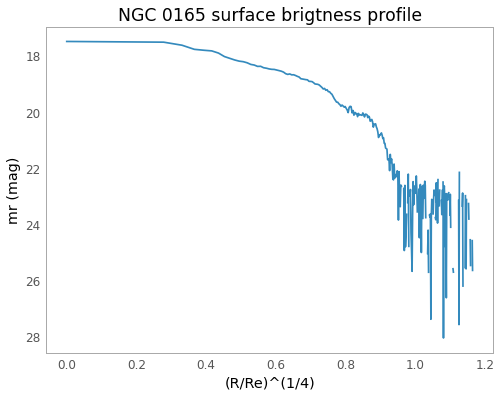

In [3]:
### surface brightness (r band)
### 0.396127 arcsec/pix

from scipy.optimize import curve_fit
from scipy import integrate

cut = image_data[791:1100, 700:900]
f = cut.sum(axis=1)
# plt.plot(f, label='data')

### Rd fit
def I (R, Rd):
    I = f[0]*np.exp(-R/Rd)
    return I

R = np.linspace(0,310,309)
popt, pcov = curve_fit(I, R, f)
# print(popt*0.396127)  ###arcsec
print(np.tan(popt*0.396127*0.0000048)*74.188*1e3)  ###kpc
# plt.plot(R,I(R, *popt),'--', label='fit')
# plt.legend( )

I = lambda R :f[0]*np.exp(-R/26.15011762)
I_t = integrate.quad(I, 0, float('inf'))[0]
Ie = I_t * 0.9
# print(I_t, Ie)

Rd = 26.15011762
Re = Rd*np.log(Ie*Rd/f[0])
print(np.tan(popt*0.396127*0.0000048)*74.188*1e3*1.687)

plt.plot((R/Re)**0.25, 22.5-2.5*np.log10(f), label='data')
# plt.plot((R/Re)**0.25, 22.5-2.5*np.log10(f[0]*np.exp(-R/26.15011762)), '--', label='fit')
plt.grid(None)
plt.gca().invert_yaxis( )
plt.ylabel('mr (mag)')
plt.xlabel('(R/Re)^(1/4)')
plt.title('NGC 0165 surface brigtness profile')
# plt.legend( )

Text(0.5, 1.0, 'spectra')

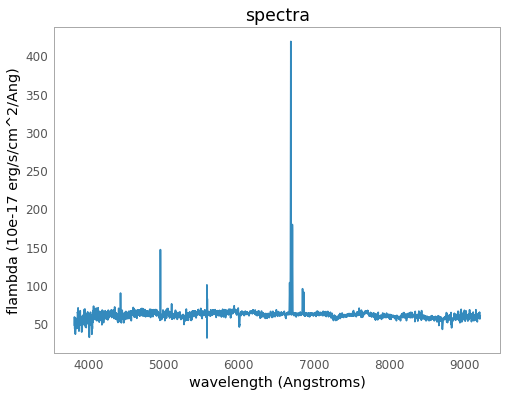

In [4]:
### spectra
spec = fits.open('spec-0654-52146-0038.fits')
# spec.info( )
data_spec = spec[1].data
flux = data_spec['flux']
lam = 10**data_spec['loglam']
plt.plot(lam, flux)
plt.grid(None)
plt.ylabel('flambda (10e-17 erg/s/cm^2/Ang)')
plt.xlabel('wavelength (Angstroms)')
plt.title('spectra')

Text(0.5, 1.0, 'D4000')

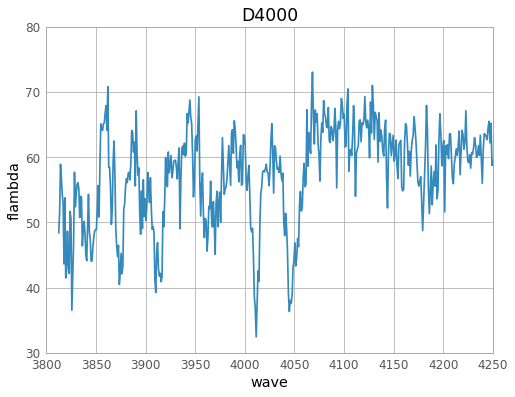

In [5]:
plt.plot(lam, flux)
plt.ylim(30, 80)
plt.xlim(3800,4250)
plt.xlabel('wave')
plt.ylabel('flambda')
plt.title('D4000')

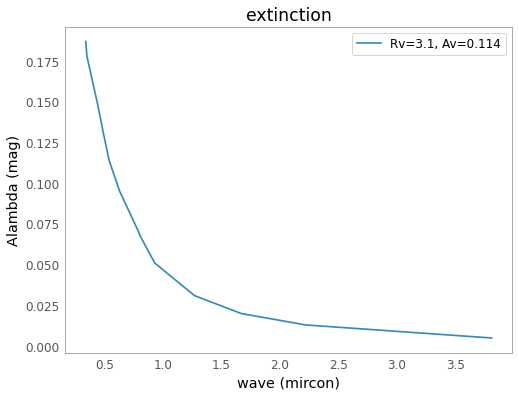

In [6]:
### extinction for NGC0165 based on SFD98

filt = [0.34, 0.35, 0.44, 0.49, 0.54, 0.63, 0.65, 0.78, 0.81, 0.93, 1.27, 1.67, 2.22, 3.81]
Alam = [0.187, 0.178, 0.149, 0.131, 0.114, 0.095, 0.092, 0.072, 0.067, 0.051, 0.031, 0.02, 0.013, 0.005]
plt.plot(filt, Alam, label='Rv=3.1, Av=0.114')
plt.xlabel('wave (mircon)')
plt.ylabel('Alambda (mag)')
plt.title('extinction')
plt.grid(None)
plt.legend( )

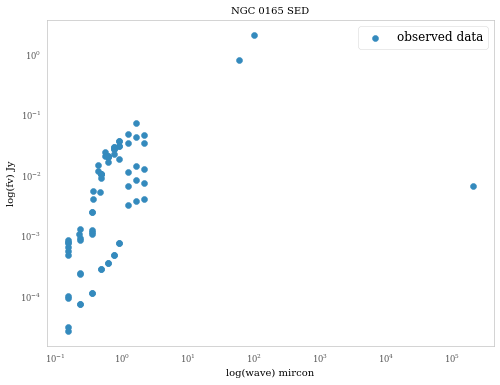

In [11]:
### SED observed data
### v: Hz, Units: Jy

from astropy.table import Table
data = Table.read('sed.csv')
v = data['Freq (Hz)']
f = data['Measurement_1']
c = 3e14
plt.scatter(c/v, f, label='observed data')
plt.yscale('log')
plt.xscale('log')
plt.grid(None)
plt.title('NGC 0165 SED')
plt.xlabel('log(wave) mircon')
plt.ylabel('log(fv) Jy')
plt.legend( )

In [14]:
from sdss import Region
ra = 23.4620691
dec = 30.6601751
reg = Region(ra, dec)
df_obj = reg.nearest_objects()
df_sp = reg.nearest_spects()
print(df_sp)

Empty DataFrame
Columns: [objID, specObjID, distance, ra, dec, class, subClass, u, g, r, i, z, redshift, zErr, zWarning]
Index: []
